<a href="https://colab.research.google.com/github/ghadikq/SDA_Files/blob/main/LogisticRegression_and_SGDClassifier_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


In [3]:
# to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import needed packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score , confusion_matrix

1. Load in your dataset through its CSV link.

NOTE: I used the data I cleaned from the weekend project

In [50]:
df = pd.read_csv('https://github.com/ghadikq/SDA_Files/raw/main/data/ml_churn_data.csv')
df.head(3)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,Male,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year,MultipleLines=No,MultipleLines=No phone service,MultipleLines=Yes,InternetService=DSL,InternetService=Fiber optic,InternetService=No,OnlineSecurity=No,OnlineSecurity=No internet service,OnlineSecurity=Yes,OnlineBackup=No,OnlineBackup=No internet service,OnlineBackup=Yes,DeviceProtection=No,DeviceProtection=No internet service,DeviceProtection=Yes,TechSupport=No,TechSupport=No internet service,TechSupport=Yes,StreamingTV=No,StreamingTV=No internet service,StreamingTV=Yes,StreamingMovies=No,StreamingMovies=No internet service,StreamingMovies=Yes
0,5087-SUURX,0,1,0,18,0,1,39.05,669.85,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
1,1764-VUUMT,0,0,1,66,1,0,19.95,1269.10,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0089-IIQKO,0,1,1,39,1,1,99.95,3767.40,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1


2. Find out some information about the data...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            6338 non-null   object 
 1   SeniorCitizen                         6338 non-null   int64  
 2   Partner                               6338 non-null   int64  
 3   Dependents                            6338 non-null   int64  
 4   tenure                                6338 non-null   int64  
 5   PhoneService                          6338 non-null   int64  
 6   PaperlessBilling                      6338 non-null   int64  
 7   MonthlyCharges                        6338 non-null   float64
 8   TotalCharges                          6338 non-null   float64
 9   Churn                                 6338 non-null   int64  
 10  Female                                6338 non-null   int64  
 11  Male             

In [7]:
# check data dimension
df.shape

(6338, 43)

In [8]:
# see Churn values
df.Churn.unique()

array([1, 0])

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [9]:
df.corr().style.background_gradient(cmap='Blues')

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,Male,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year,MultipleLines=No,MultipleLines=No phone service,MultipleLines=Yes,InternetService=DSL,InternetService=Fiber optic,InternetService=No,OnlineSecurity=No,OnlineSecurity=No internet service,OnlineSecurity=Yes,OnlineBackup=No,OnlineBackup=No internet service,OnlineBackup=Yes,DeviceProtection=No,DeviceProtection=No internet service,DeviceProtection=Yes,TechSupport=No,TechSupport=No internet service,TechSupport=Yes,StreamingTV=No,StreamingTV=No internet service,StreamingTV=Yes,StreamingMovies=No,StreamingMovies=No internet service,StreamingMovies=Yes
SeniorCitizen,1.000000,0.015733,-0.211057,0.020302,0.004944,0.157515,0.216512,0.102494,0.148331,0.001738,-0.001738,-0.015704,-0.020626,0.169522,-0.156361,0.137449,-0.046728,-0.115642,-0.138745,-0.004944,0.143370,-0.105989,0.250127,-0.180240,0.184062,-0.180240,-0.040256,0.081557,-0.180240,0.069996,0.091176,-0.180240,0.059891,0.206096,-0.180240,-0.064235,0.044631,-0.180240,0.106540,0.033230,-0.180240,0.117919
Partner,0.015733,1.000000,0.449023,0.387772,0.017945,-0.018148,0.101796,0.325482,-0.147770,-0.004378,0.004378,0.111076,0.082130,-0.083858,-0.096052,-0.282132,0.083600,0.249048,-0.136731,-0.017945,0.149160,0.000935,0.002055,-0.003580,-0.135577,-0.003580,0.152719,-0.142794,-0.003580,0.152302,-0.144674,-0.003580,0.153845,-0.105245,-0.003580,0.118716,-0.120814,-0.003580,0.124409,-0.115224,-0.003580,0.118594
Dependents,-0.211057,0.449023,1.000000,0.160448,-0.000629,-0.118245,-0.110960,0.062532,-0.159499,-0.011079,0.011079,0.049840,0.056121,-0.145804,0.060569,-0.225538,0.065477,0.200374,0.018692,0.000629,-0.019292,0.052495,-0.161879,0.135360,-0.183330,0.135360,0.079959,-0.135081,0.135360,0.024587,-0.126366,0.135360,0.015354,-0.166334,0.135360,0.060923,-0.094429,0.135360,-0.018804,-0.070866,0.135360,-0.042501
tenure,0.020302,0.387772,0.160448,1.000000,0.000201,0.008270,0.253420,0.830774,-0.352852,-0.006877,0.006877,0.238766,0.236431,-0.207422,-0.234843,-0.646061,0.199233,0.562908,-0.325528,-0.000201,0.329517,0.018736,0.020267,-0.046360,-0.259710,-0.046360,0.328203,-0.317831,-0.046360,0.372058,-0.315825,-0.046360,0.368972,-0.263473,-0.046360,0.330798,-0.245130,-0.046360,0.285262,-0.249490,-0.046360,0.289185
PhoneService,0.004944,0.017945,-0.000629,0.000201,1.000000,0.017608,0.250153,0.109533,0.013676,0.006111,-0.006111,0.003596,-0.007698,0.008584,-0.005691,0.006645,-0.008449,0.000278,0.317128,-1.000000,0.281192,-0.453111,0.292824,0.171380,-0.058244,0.171380,-0.090474,-0.092177,0.171380,-0.051268,-0.069640,0.171380,-0.074720,-0.050650,0.171380,-0.098397,-0.116190,0.171380,-0.027192,-0.109966,0.171380,-0.033505
PaperlessBilling,0.157515,-0.018148,-0.118245,0.008270,0.017608,1.000000,0.352807,0.158823,0.190625,0.009738,-0.009738,-0.014157,-0.013596,0.205989,-0.206208,0.169264,-0.050926,-0.148685,-0.147908,-0.017608,0.160267,-0.062224,0.327057,-0.324422,0.268555,-0.324422,-0.003274,0.140767,-0.324422,0.132293,0.162429,-0.324422,0.109554,0.232096,-0.324422,0.036778,0.053871,-0.324422,0.218358,0.067139,-0.324422,0.204898
MonthlyCharges,0.216512,0.101796,-0.110960,0.253420,0.250153,0.352807,1.000000,0.650070,0.186630,0.013217,-0.013217,0.046001,0.026564,0.268326,-0.376189,0.055776,0.001558,-0.066386,-0.334976,-0.250153,0.489570,-0.165248,0.785887,-0.761278,0.354925,-0.761278,0.295818,0.205784,-0.761278,0.440572,0.168269,-0.761278,0.478925,0.315523,-0.761278,0.337729,0.012285,-0.761278,0.627073,0.015763,-0.761278,0.623040
TotalCharges,0.102494,0.325482,0.062532,0.830774,0.109533,0.158823,0.650070,1.000000,-0.201551,-0.000930,0.000930,0.186211,0.182691,-0.062411,-0.294178,-0.448339,0.165588,0.364719,-0.395251,-0.109533,0.465896,-0.051744,0.357710,-0.373786,-0.065544,-0.373786,0.409662,-0.185543,-0.373786,0.515798,-0.194075,-0.373786,0.523502,-0.090659,-0.373786,0.435333,-0.19

In [10]:
# take long time because of data size
# sns.pairplot(df)

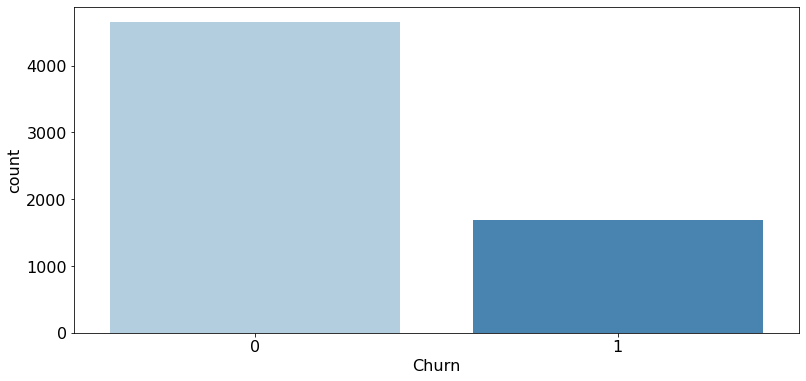

In [51]:
plt.figure(figsize=(13,6))
sns.countplot(x='Churn', data=df ,palette='Blues')
plt.show()

4. Split your data into training and testing datasets...

In [12]:
# split data with one variable 
X = df['MonthlyCharges']
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [15]:
preds = lr.predict(pd.DataFrame(X_test))

Text(0.5, 1.0, 'Confusion Matrix')

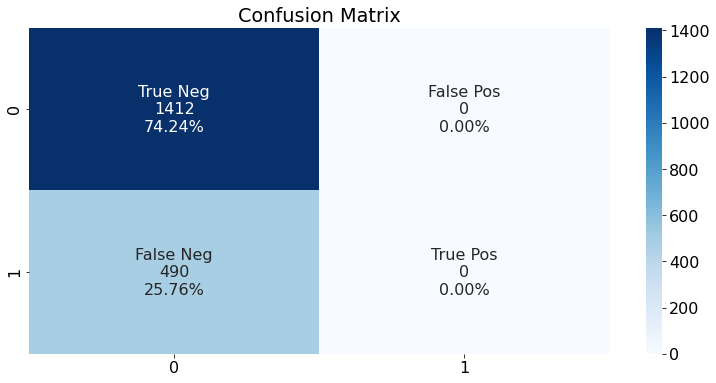

In [16]:
# what do they look like? (show me some of the predictions)
# create confusion matrix plot
cf_matrix = confusion_matrix(y_test, preds)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 16})

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set_title("Confusion Matrix")

7. Score your model...
- accuracy_score
- confusion_matrix

In [17]:
accuracy_score(y_true=y_test, y_pred=preds)

0.7423764458464774

In [18]:
# also use confusion matrix to see prediction results/preformance 
logconfusion_matrix = confusion_matrix(y_test, preds)
print(logconfusion_matrix)

[[1412    0]
 [ 490    0]]


8. Create, and fit a LogisticRegression model with **more than** 1 variable

In [19]:
# split data with all variables 
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [20]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [21]:
lr.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

Text(0.5, 1.0, 'Confusion Matrix')

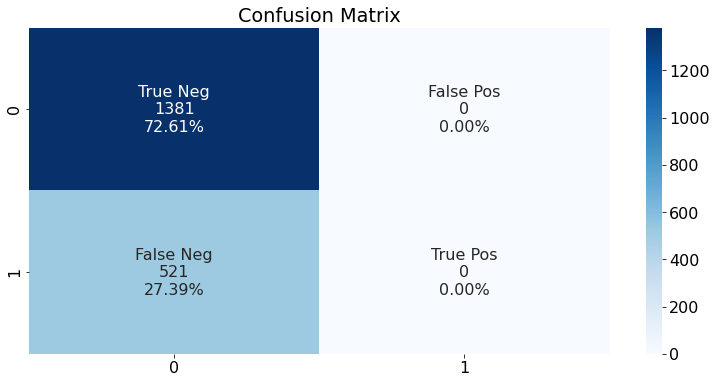

In [22]:
# what do they look like? (show me some of the predictions)
# create confusion matrix plot
cf_matrix = confusion_matrix(y_test, preds)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 16})

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set_title("Confusion Matrix")

10. Score your model...
- accuracy_score
- confusion_matrix

In [23]:
accuracy_score(y_true=y_test, y_pred=preds)

0.7260778128286015

In [24]:
logconfusion_matrix = confusion_matrix(y_test, preds)
print(logconfusion_matrix)

[[1381    0]
 [ 521    0]]


11. Which model is better? Why?

The **second model** is better since that **True Positive** in second model is **higher** than first model 

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

your stuff here

In [25]:
# split data with all variables 
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [26]:
sgdc = SGDClassifier()

In [27]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
preds = sgdc.predict(X_test)

In [29]:
accuracy_score(y_test, preds)

0.7749737118822292

Text(0.5, 1.0, 'Confusion Matrix')

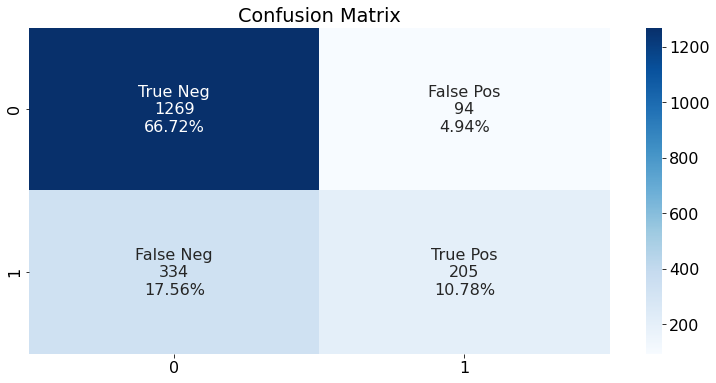

In [30]:
# create confusion matrix plot
cf_matrix = confusion_matrix(y_test, preds)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 16})

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set_title("Confusion Matrix")


### **I already did this in my weekend project and know that its best with the default parameters**
### So for below questions 
### **I want to try somthing new for this assignmet and do it on SGDClassifier instead**

12. Perform GridSearchCV with the better data 


In [31]:
param_dict = {'loss': ['log', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'max_iter': [10, 100, 250, 500, 1000, 10000],
              'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'alpha':[0.0001, 0.5, 0.75, 1, 1.5, 3],
              'fit_intercept':[True,False],
              'shuffle':[True, False]
              }

sgdc = SGDClassifier()

grid = GridSearchCV(sgdc, param_dict)

In [32]:
grid.fit(X_train, y_train) #  NOTE: toke alot of time to run gridsearch

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0...
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.5, 0.75, 1, 1.5, 3],
                         'fit_intercept': [True, False],
                         'loss': ['log', 'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
           

In [33]:
# show best parameters
grid.best_params_

{'alpha': 0.75,
 'fit_intercept': False,
 'loss': 'log',
 'max_iter': 10000,
 'penalty': 'none',
 'shuffle': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [42]:
sgdc = SGDClassifier(alpha=0.75, fit_intercept=False, loss='log', max_iter=1000, penalty = None, shuffle=True)#  NOTE: Some are the default value but write it for record

In [43]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.75, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=False,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty=None, power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

14. Score the new model... 
- r2_score
- some other metric of your choice

In [44]:
preds = sgdc.predict(X_test)

In [45]:
accuracy_score(y_test, preds)

0.7786540483701367

In [46]:
confusion_matrix(y_test, preds)

array([[1273,   90],
       [ 331,  208]])

Text(0.5, 1.0, 'Confusion Matrix')

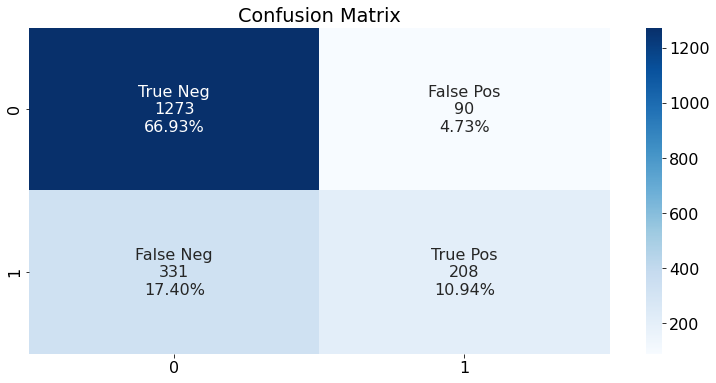

In [47]:
# create confusion matrix plot
cf_matrix = confusion_matrix(y_test, preds)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 16})

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set_title("Confusion Matrix")

Did the score change at all? Why?

Yes, because I use different parameters for the second model and these parameters were taken from a grid search result for the best parameters

Here you can check how my second model improved from the first model 

In [48]:
# first model accuracy_score - second model accuracy_score
0.7260778128286015 - 0.7786540483701367

-0.05257623554153523

In [49]:
# is first model accuracy_score < second model accuracy_score
0.7260778128286015 < 0.7786540483701367

True